출처 : https://www.kaggle.com/joyeongjin/visualising-a-high-dimensional-dataset/edit

# 고차원 데이터셋에서 군집들을 빠르게 보는 방법 

***Liana Napalkova***

***6 October 2018***

# Table of contents
1. [Introduction](#introduction)
2. [Data loading](#load_data)
3. [Dimensionality reduction](#dimred_data)
4. [Conclusions](#concl)

## 1. Introduction <a name="introduction"></a>

고차원 데이터셋에서 군집들을 분류하는 일은 특정 모델들을 훈련 시키고 시각화 하면 가능합니다. 그렇지만, 모델을 아무리 훈련시켜도 잘 분류가 안되는 경우도 있습니다. 만일 원래 분류가 잘 안되는 데이터셋인데 내가 모델을 잘못 훈련시켰다고 생각하고 계속 학습한다면 시간 낭비일 것입니다. 따라서 분류하기 전에, 우리가 가진 고차원 데이터셋이 충분히 군집을 이루는지를 먼저 확인하는게 좋습니다. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data loading <a name="load_data"></a>

![Ref](https://www.worldofchemicals.com/article/104/image/Wine-chemistry.jpg)

- [wine dataset 사용](http://archive.ics.uci.edu/ml/datasets/wine)
- customer_segment를 target 열로 wine의 3가지 품종을 구별할 수 있는지 체크해보겠습니다. 
- 결측치 없고, 모두 수치형 데이터이므로 전처리는 필요 없습니다. 

In [3]:
df=pd.read_csv("./datasets/wine/Wine.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df["Customer_Segment"].unique()

array([1, 2, 3], dtype=int64)

In [5]:
X = df.drop("Customer_Segment",axis=1)
y = df["Customer_Segment"]

## 3. 차원축소 <a name="dimred_data"></a>

앞서 언급했듯, 이 노트북은 고차원 데이터셋의 군집을 보여주는 것이 목적입니다. 이 데이터셋에는 총 13개의 독립적인 피쳐들이 있습니다. 하지만 13차원을 우리가 시각적으로 상상하기는 어렵기 때문에 2차원으로 차원 축소를 진행하겠습니다. 

차원축소란 고차원 데이터셋을 저차원 공간에 매핑하는 일입니다. 만일 2,3차원으로 매핑한다면 우리가 쉽게 이 데이터셋의 구조를 파악할 수 있습니다. 따라서 시각화하는데 유용하므로, 우리는 차원 축소를 진행합니다. 

세 가지 차원 축소 기법을 비교하겠습니다:

* Principal component analysis (PCA)
* Isometric Mapping
* t-Distributed Stochastic Neighbor Embedding (t-SNE)

### Principal component analysis (PCA)

PCA는 전통적인 차원 축소 기법입니다. PCA는 비슷하지 않은 데이터포인터들끼리 떨어지도록 저차원에 매핑하는 기법을 사용합니다. **선형**모델이기 때문에 **비선형**경계를 구분하기는 어렵다는 단점이 있습니다. 

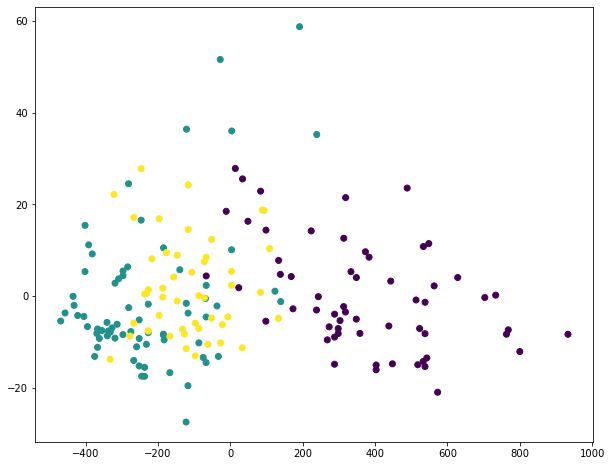

In [6]:
X_pca = PCA(n_components="mle",svd_solver='auto').fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

이 그래프에서 무슨 결론을 내릴 수 있을까요? 우리는 비슷한 데이터 포인터들이 넓게 퍼져있는 것을 볼 수 있습니다. 사실 와인 데이터셋은 상당히 군집화가 잘 작동합니다. 하지만 복잡한 데이터셋의 경우에는 PCA로는 군집화가 잘 되지 않을지도 모릅니다. 

### Isometric Mapping

Isometric Mapping은 비선형적 방법을 쓰는 차원 축소 기법입니다. 비선형 차원 축소란 고차원에서는 비선형적인 경계를 가진 벡터들을 저차원으로 축소 시키는 다는 의미입니다. 

이 알고리즘의 문제는 인근 점의 수를 어떻게 정하느냐에 결과가 달라질 수 있다는 단점이 있습니다. 즉, 몇 가지의 이상치가 매핑을 망칠 수도 있습니다. 이 알고리즘의 민감성을 아래에서 확인할 수 있습니다. n_neighbors를 5개와 40개를 비교해보겠습니다. 

C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\sklearn\manifold\_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


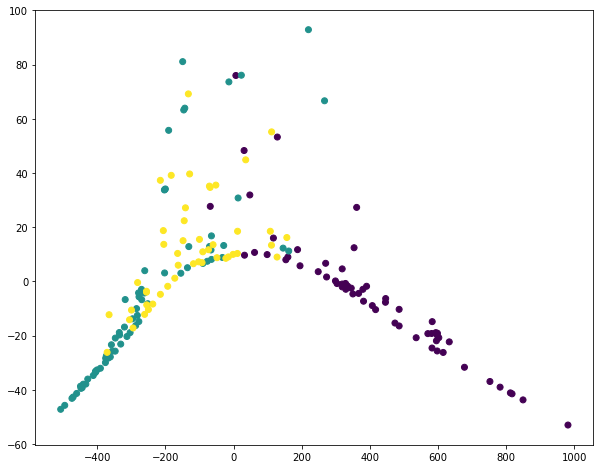

In [7]:
embedding = Isomap(n_components=2,n_neighbors=5)
X_isomap = embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)

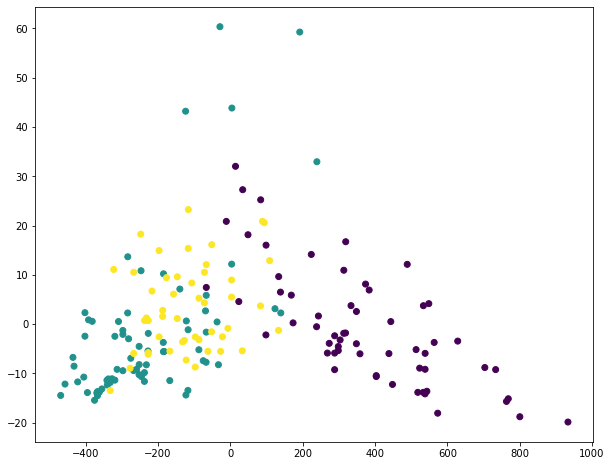

In [8]:
embedding = Isomap(n_components=2,n_neighbors=40)
X_isomap = embedding.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)

neighbors 수에 민감한데다가, Isometric Mapping은 클래스끼리 서로 겹치는 현상이 발생합니다. 

지금까지 두 차원 축소 기법 PCA와 Isometric Mapping을 진행했습니다. 아래 그림은 두 차원 축소 기법의 핵심 차이점을 나타냅니다. 
([Source](http://stats.stackexchange.com/questions/124534/how-to-understand-nonlinear-as-in-nonlinear-dimensionality-reduction)).

![Difference between linear and non-linear dimensionality reduction methods](https://i.stack.imgur.com/vbxE9.jpg)

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

마지막으로 t-sne 방법을 사용해보겠습니다. 이 방법은 고차원에서의 국부적인 구조를 상당히 잘 캡쳐해낼 뿐만 아니라 몇 가지 스케일에서의 군집같은 전체적인 구조도 보여줍니다. **t-sne는 국부적인 구조를 보존합니다. 고차원에서의 데이터들 간 거리를 새롭게 매핑한 저차원에서도 최대한 근접하게 맞추도록 노력합니다.**

C:\Users\Administrator\anaconda3\envs\Hands-On-MachineLearning\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


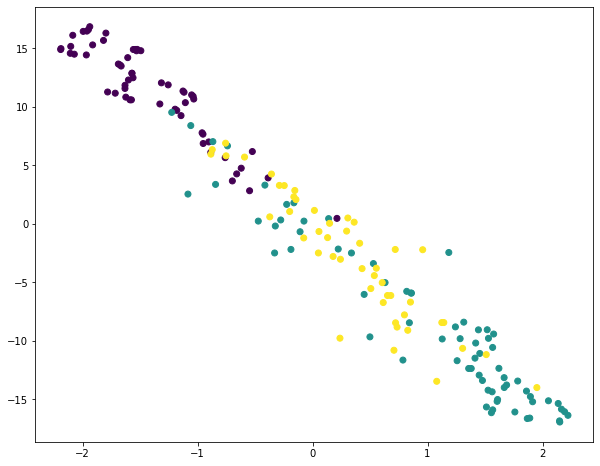

In [9]:
# Random state
RS = 20150101
X_tsne = TSNE(random_state=RS,learning_rate=5,metric="euclidean").fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

## 4. Conclusions <a name="concl"></a>

<Figure size 432x288 with 0 Axes>

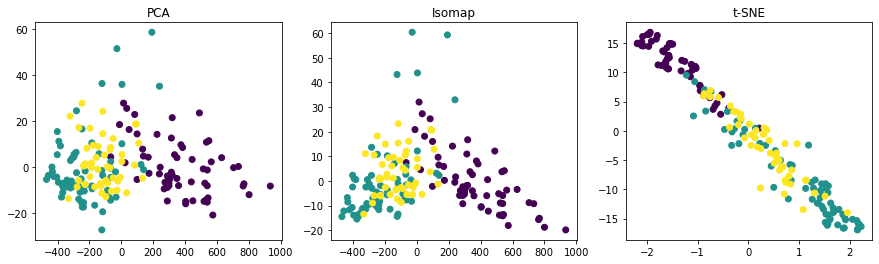

In [10]:
fig = plt.figure(figsize=(6, 4))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
_ = ax1.set_title('PCA')
ax2.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)
_ = ax2.set_title('Isomap')
ax3.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
_ = ax3.set_title('t-SNE')

만일 우리가 와인 데이터셋에서 3가지 방법을 비교해본다면, 우리는 t-sne 구조가 3개의 범주를 구분하는데 꽤 잘 작동했다는 것을 알 수 있습니다. 우리는 데이터셋에서 꽤 명확하게 3개의 군집이 있다는 사실을 확인했고, 이 사실은 우리가 이 데이터셋에서 올바른 분류를 진행할 수 있다는 기초가 됩니다. 

**그러므로 우리는 분류 모델을 처음부터 힘겹게 훈련 하기 전에 빠르게 군집들의 존재를 확인할 수 있습니다.**